In [35]:
from scipy.spatial import distance_matrix
import pandas as pd

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
data = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/movies/movies.csv", sep=";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [38]:
# me interesa solo los valores de cada película, prescindo de la columna user id:
# convierto a lista cada una de las columnas
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [39]:
# calculo la matriz de distancias:

dd1 = distance_matrix(data[movies], data[movies],p=1)
dd2 = distance_matrix(data[movies], data[movies],p=2)
dd10 = distance_matrix(data[movies], data[movies],p=10)

In [40]:
dd1

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [41]:
dd2

array([[ 0.        ,  6.68505797, 10.14347081,  6.22976725,  3.44963766,
         4.74236228,  7.24499827,  5.04777179,  3.63318042,  0.41231056],
       [ 6.68505797,  0.        ,  7.6223356 , 10.35470907,  5.33760246,
         4.63465209,  0.6164414 ,  3.6180105 ,  8.01560977,  6.57875368],
       [10.14347081,  7.6223356 ,  0.        ,  8.66602562, 10.77914653,
         6.00499792,  7.62627039, 10.01049449,  8.42436941,  9.77036335],
       [ 6.22976725, 10.35470907,  8.66602562,  0.        ,  8.84816365,
         6.47610994, 10.82312339,  9.95841353,  3.48281495,  5.89067059],
       [ 3.44963766,  5.33760246, 10.77914653,  8.84816365,  0.        ,
         6.11310069,  5.92199291,  2.16794834,  6.70969448,  3.61247837],
       [ 4.74236228,  4.63465209,  6.00499792,  6.47610994,  6.11310069,
         0.        ,  4.94974747,  5.98748695,  3.94588393,  4.43170396],
       [ 7.24499827,  0.6164414 ,  7.62627039, 10.82312339,  5.92199291,
         4.94974747,  0.        ,  4.15331193

In [42]:
dd10

array([[0.        , 5.80151405, 7.87518912, 4.71580324, 3.4       ,
        4.40000323, 6.40084969, 4.40102467, 3.20008504, 0.3010246 ],
       [5.80151405, 0.        , 5.58246346, 7.68068873, 5.3       ,
        4.40000468, 0.6       , 3.4000102 , 6.43515864, 5.60379989],
       [7.87518912, 5.58246346, 0.        , 8.10000659, 7.40891444,
        4.91253202, 5.68944974, 6.57025374, 6.82060178, 7.65836384],
       [4.71580324, 7.68068873, 8.10000659, 0.        , 7.80125508,
        4.71710153, 7.87330678, 8.80020486, 3.00010148, 4.45075873],
       [3.4       , 5.3       , 7.40891444, 7.80125508, 0.        ,
        4.68146419, 5.9       , 1.90030967, 6.60000001, 3.6       ],
       [4.40000323, 4.40000468, 4.91253202, 4.71710153, 4.68146419,
        0.        , 4.50013531, 5.60001891, 3.40168276, 4.20000049],
       [6.40084969, 0.6       , 5.68944974, 7.87330678, 5.9       ,
        4.50013531, 0.        , 4.00000099, 6.59525879, 6.20203476],
       [4.40102467, 3.4000102 , 6.5702537

In [43]:
# pero así es poco visual, lo pasamos a dataframe

#hacemos función para pasar de matriz de distancias (dm) a dataframe (df):

def dm_to_df(dd,col_name):
    import pandas as pd
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [44]:
dm_to_df(dd1,data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [ ]:
# lectura de la tabla de arriba: 
# el usuario 1 y 10 se parecen (su distancia es solo 0.7). Lo mismo con 2 y 7
# usuarios que no se parecen: 3 y 5, 4 y 7

In [45]:
dm_to_df(dd2,data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [46]:
dm_to_df(dd10,data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


In [47]:
# ahora representamos gráficamente estas matrices:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


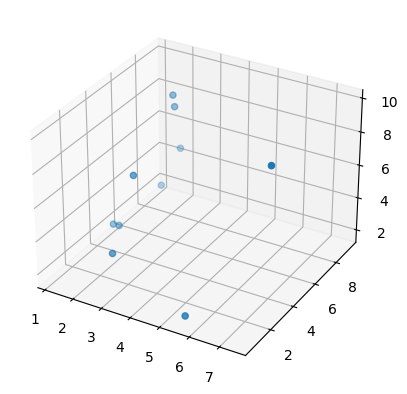

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"], zs=data["harry_potter"])

# Enlaces

In [24]:
# tomamos cualquiera de las matrices distancia, por ejemplo la dd1

In [71]:
df = dm_to_df(dd1,data["user_id"])
df

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [ ]:
# recreamos a mano el CLUSTERING

In [72]:
# en esta matriz, inicialmente vacía, iré metiendo los grupos que iré uniendo
Z = []

In [73]:
# localizamos de la matriz cuál es la distancia más pequeña:
# en nuestro caso, es el 0.7
# defino una nueva columna, la 11 y, usando enlace simple, promedio, completo,.... (el que queramos, unimos los datos)
df[11]=df[1]+df[10]
# tambien lo hago por filas, uso .loc para meter una nueva fila
df.loc[11]=df.loc[1]+df.loc[10]
# además, añado a Z los puntos 1 y 10, que estaban a 0,7 y que hemos unido dos puntos (2)
Z.append([1,10,0.7,2])  
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [74]:
for i in df.columns.values.tolist():
    df.loc[11][i] = min(df.loc[1][i], df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][1], df.loc[i][10])
df
# lo que hacemos aquí es sustituir la fila 11 y la columna 11 por el mínimo valor entre las filas y columnas 1 y 10

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [75]:
# y ahora puedo quitar la columna y fila 1 y 10, ya que las hemos aglutinado en la 11

df = df.drop([1,10], axis = 0)
df = df.drop([1,10], axis = 1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [76]:
# continuamos con otras dos columnas: ahora el número menor es el 0.8 de 2 y 7:

x=2
y=7

n= 12

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2])  

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [77]:
Z

[[1, 10, 0.7, 2], [2, 7, 0.7999999999999994, 2]]

In [78]:
# continuamos con el 3.2 de 5 y 8

x=5
y=8

n= 13

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2])  

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [79]:
# continuamos con el 3.9 de 11 y 13


x=11
y=13

n= 14

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2])  

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


In [80]:
# continuamos con el 4.9 de 9,12 y 14 ¡¡¡¡añadimos uno más porque el 4.9 está dos veces!!!

x=9
y=12
z=14

n= 15

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],3])  

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z], axis = 0)
df = df.drop([x,y,z], axis = 1)
df


user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [81]:
# continuamos con el 5.5 de 4,6 y 15 ¡¡¡¡añadimos uno más porque el 5.5 está dos veces!!!

x=4
y=6
z=15

n= 16

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],3])  

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z], axis = 0)
df = df.drop([x,y,z], axis = 1)
df


user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [82]:
# continuamos con el 9 de 3 y 16


x=3
y=16

n= 17

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2])  

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df

user_id,17
user_id,
17,0.0


In [83]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 12, 11.7, 3],
 [4, 6, 11.0, 3],
 [3, 16, 9.0, 2]]

In [ ]:
# con la matriz Z podemos hacer un breve scketch

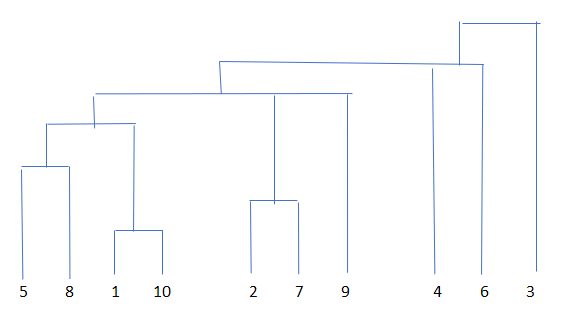

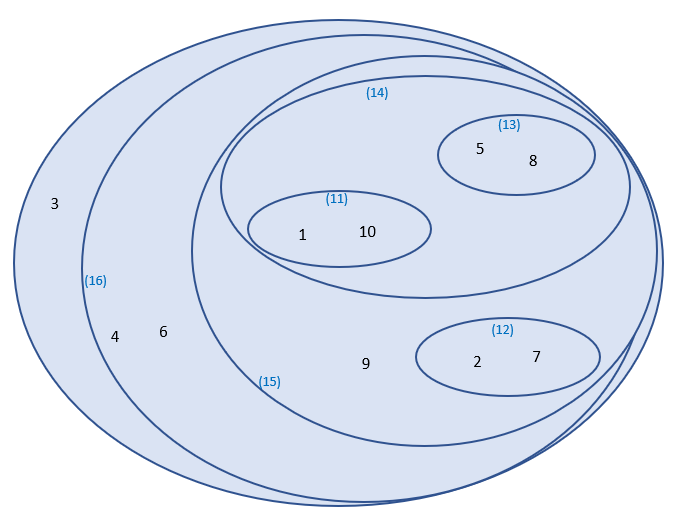

# Clustering jerárquico

In [84]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [85]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [86]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [87]:
Z = linkage(data[movies], "ward") # el método linkage "linka" los datos de movies con el método ward, podríamos haber puesto otro
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

In [ ]:
# este array nos indica qué puntos se han ido uniendo (ojo, el 0 es la columna 1)

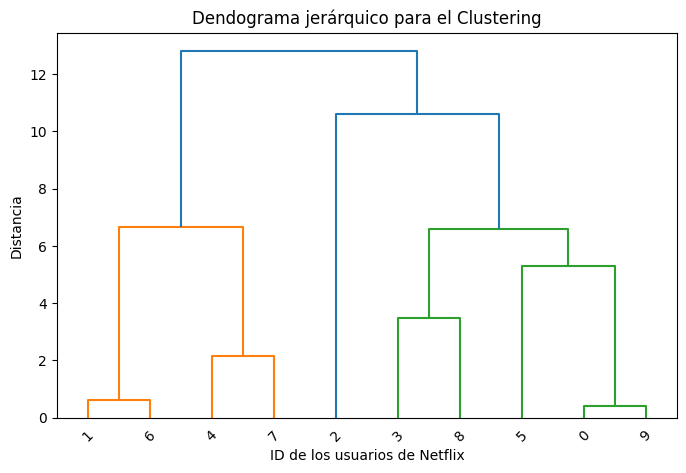

In [97]:
plt.figure(figsize=(8,5))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=45., leaf_font_size=10)   # necesita 3 parámetros: Z (la matriz), leaf rotation: 90, leaf fontsize: 10 (por defecto sale 1 y es muy pequeño)
plt.show()

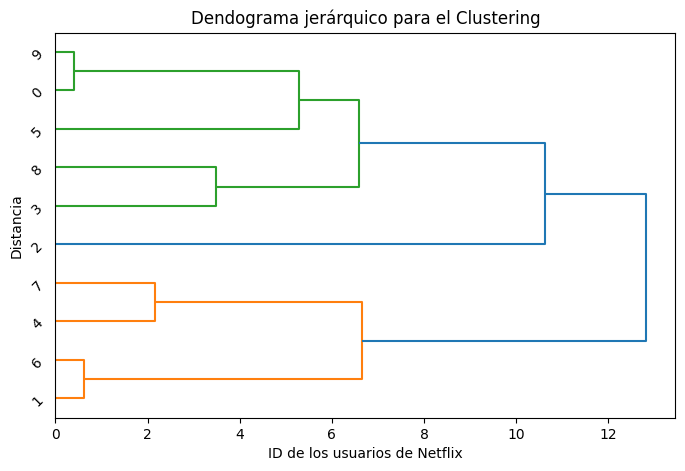

In [98]:
plt.figure(figsize=(8,5))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=45., leaf_font_size=10, orientation="right")   # necesita 3 parámetros: Z (la matriz), leaf rotation: 90, leaf fontsize: 10 (por defecto sale 1 y es muy pequeño)
plt.show()

In [ ]:
# probamos con otro método para unir puntos: "average"

In [99]:
Z = linkage(data[movies], "average") # el método linkage "linka" los datos de movies con el método ward, podríamos haber puesto otro
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 8.        , 10.        ,  3.46355712,  3.        ],
       [ 5.        , 13.        ,  4.37331672,  4.        ],
       [11.        , 12.        ,  4.75772945,  4.        ],
       [ 3.        , 14.        ,  5.51984068,  5.        ],
       [15.        , 16.        ,  6.87496749,  9.        ],
       [ 2.        , 17.        ,  8.78305268, 10.        ]])

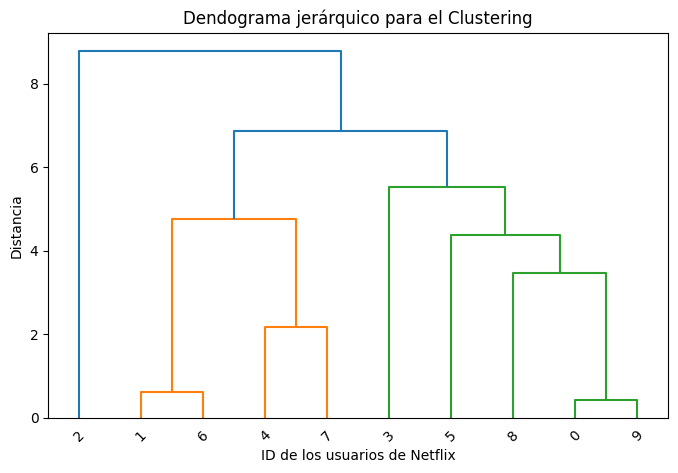

In [100]:
plt.figure(figsize=(8,5))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=45., leaf_font_size=10)   # necesita 3 parámetros: Z (la matriz), leaf rotation: 90, leaf fontsize: 10 (por defecto sale 1 y es muy pequeño)
plt.show()

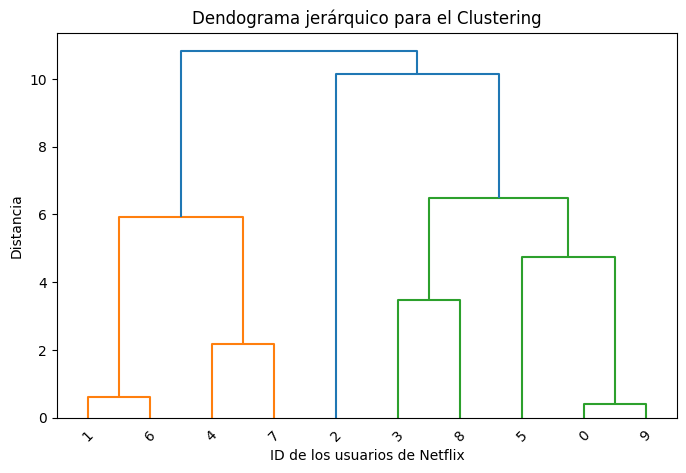

In [102]:
Z = linkage(data[movies], "complete") # el método linkage "linka" los datos de movies con el método ward, podríamos haber puesto otro
Z
plt.figure(figsize=(8,5))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=45., leaf_font_size=10)   # necesita 3 parámetros: Z (la matriz), leaf rotation: 90, leaf fontsize: 10 (por defecto sale 1 y es muy pequeño)
plt.show()

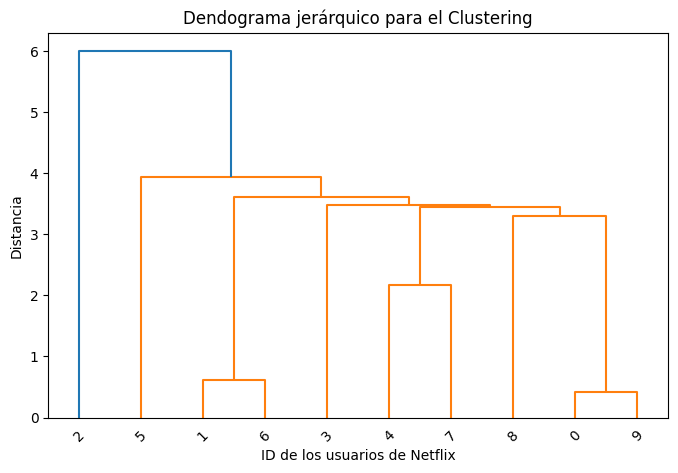

In [103]:
Z = linkage(data[movies], "single") # el método linkage "linka" los datos de movies con el método ward, podríamos haber puesto otro
Z
plt.figure(figsize=(8,5))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=45., leaf_font_size=10)   # necesita 3 parámetros: Z (la matriz), leaf rotation: 90, leaf fontsize: 10 (por defecto sale 1 y es muy pequeño)
plt.show()

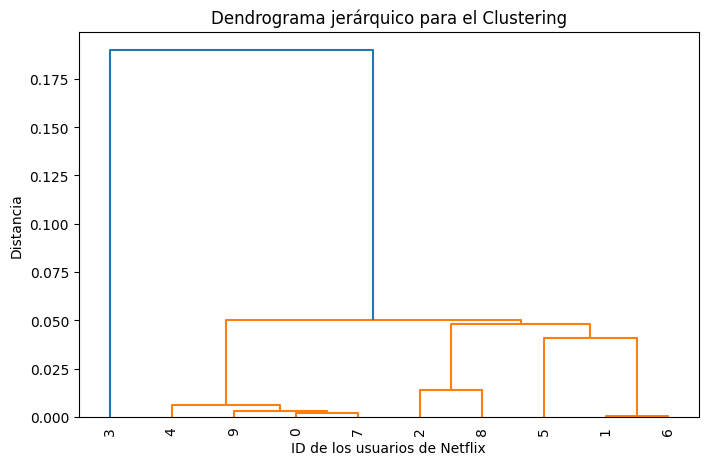

In [105]:
Z = linkage(data[movies], method="single", metric="cosine")
Z
plt.figure(figsize=(8,5))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0)
plt.show()

In [101]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [ ]:
# qué lectura sacamos:
# el número 2 queda siempre el último. Queda fuera de todos los clusters. Es un usuario atipico
# el 0 y el 9 son muy parecidos en sus notas
# lo mismo con el 1 y el 6


The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’